In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1) Import required libraries**

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import keras
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.applications import resnet50
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.python.keras import backend as K
from keras.models import Sequential, Model,load_model
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from os import listdir
from os.path import isfile, join

import math
import datetime
import platform

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [3]:
tf.__version__

'2.7.0'

**2) Data loading and exploration**

In [4]:
fpath = "/content/drive/MyDrive/datasets"
random_seed = 111

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['Viral Pneumonia', 'covid negative', 'covid positive'] 

No. of categories =  3


In [5]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category)[:]:
            file_ext = image_name.split(".")[-1]
            if (file_ext.lower() == "jpg") or (file_ext.lower() == "jpeg") or (file_ext.lower() == "png"):
                print(f"\nCategory = {category}, Image name = {image_name}") 
                img = cv2.imread(fpath+"/"+category+"/"+image_name)
                #print(img)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                #print(img)
                img_array = Image.fromarray(img, 'RGB')
                #print(img_array)
                #resize image to 299 x 299 because the input image resolution for vggNet is 299 x 299
                resized_img = img_array.resize((200, 200))
                #print(resized_img)
                img_lst.append(np.array(resized_img))

                labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

Streaming output truncated to the last 5000 lines.
Category = covid positive, Image name = COVID-556.png

Category = covid positive, Image name = COVID-561.png

Category = covid positive, Image name = COVID-555.png

Category = covid positive, Image name = COVID-559.png

Category = covid positive, Image name = COVID-565.png

Category = covid positive, Image name = COVID-560.png

Category = covid positive, Image name = COVID-566.png

Category = covid positive, Image name = COVID-563.png

Category = covid positive, Image name = COVID-56.png

Category = covid positive, Image name = COVID-557.png

Category = covid positive, Image name = COVID-553.png

Category = covid positive, Image name = COVID-558.png

Category = covid positive, Image name = COVID-576.png

Category = covid positive, Image name = COVID-568.png

Category = covid positive, Image name = COVID-57.png

Category = covid positive, Image name = COVID-570.png

Category = covid positive, Image name = COVID-573.png

Category = covid

In [6]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [7]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (7316, 200, 200, 3) 
Labels shape =  (7316,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Training data shape :  (7316, 200, 200, 3) (7316,)
Total number of outputs :  3
Output classes :  [0 1 2]


Text(0.5, 1.0, 'Leaf : 0')

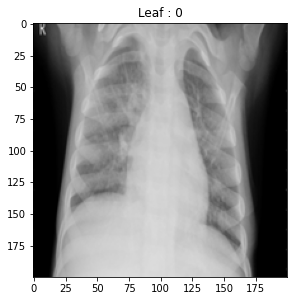

In [8]:
print('Training data shape : ', images.shape,labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(images[25,:,:], cmap='gray')
plt.title("Leaf : {}".format(labels[25]))



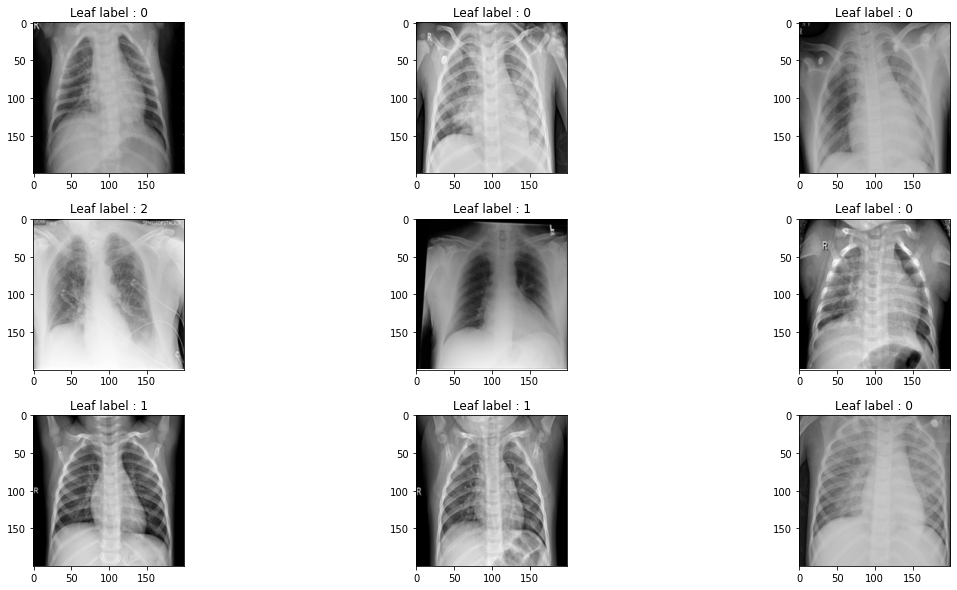

In [9]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        #plt.figure(figsize=[10,5])

        plt.title('Leaf label : {}'.format(labels[r[0]]))
#        plt.xticks([])
#       plt.yticks([])
      
    plt.show()
    
display_rand_images(images, labels)

**3) Prepare data for CNN model training**

Step 1 - shuffle the data loaded from the dataset

In [10]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
#print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
#print("\n'n' values after shuffling = ",n)

In [11]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (7316, 200, 200, 3) 
Labels shape after shuffling =  (7316,)


Step 2 - Data normalization

In [12]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (7316, 200, 200, 3)


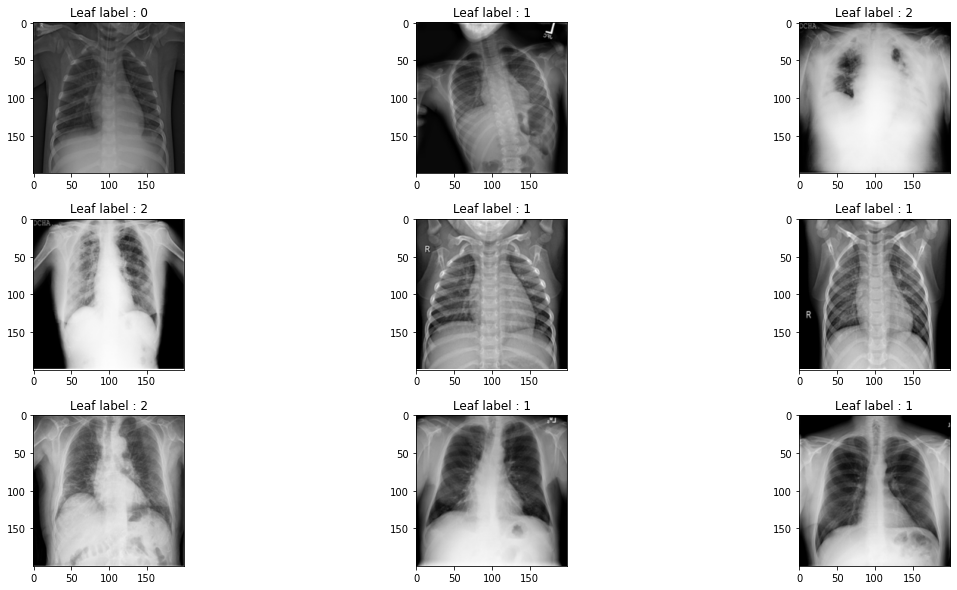

In [13]:
display_rand_images(images, labels)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state =random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("\ny_test shape = ",y_test.shape)



x_train shape =  (5852, 200, 200, 3)
y_train shape =  (5852,)

x_test shape =  (1464, 200, 200, 3)

y_test shape =  (1464,)


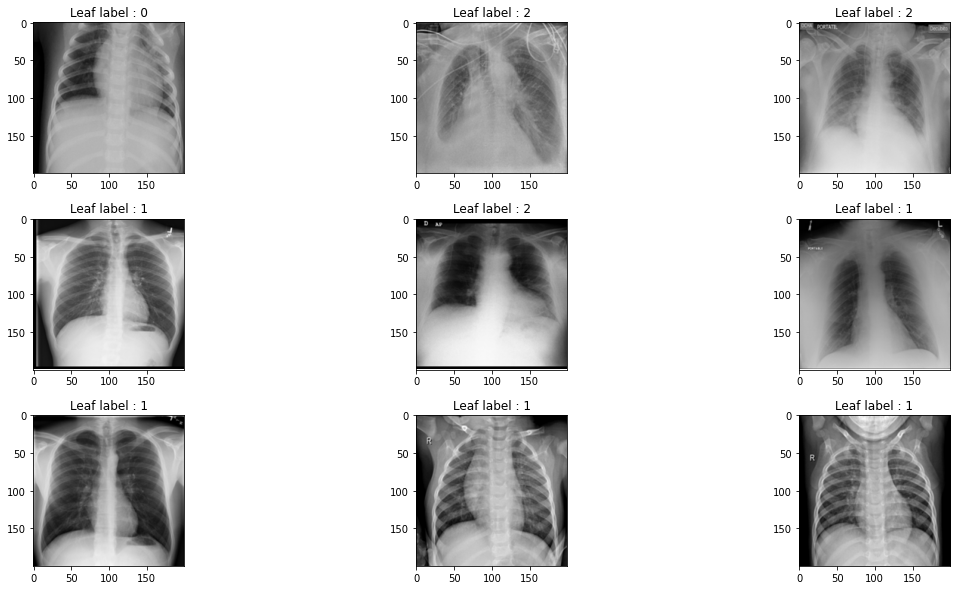

In [15]:
display_rand_images(x_train, y_train)

**4) Define CNN model (AlexNet)**

In [16]:
from tensorflow.keras.layers import (
    BatchNormalization
)

In [17]:
def create_model():

  base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(200,200,3))
  
  x = Flatten()(base_model.output)
  x = Dense(1024, activation='relu')(x)
  x = Dropout(.2)(x)
  x = Dense(256, activation='relu')(x)
  x = Dropout(.1)(x)
  x = Dense(64, activation='relu')(x)
  x = Dropout(.1)(x)
  x = Dense(32, activation='relu')(x)
  x = Dropout(.05)(x)
  output=Dense(3,activation='softmax')(x)
  model=Model(base_model.input,output)
  
  return model

model = create_model()
model.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 99, 99, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 99, 99, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                             

In [18]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Accuracy

In [ ]:
hist= model.fit(x_train, y_train, epochs=15)

Epoch 1/15
 45/183 [======>.......................] - ETA: 27:16 - loss: 1.4782 - accuracy: 0.4833

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

Validation Accuracy

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_test, y_test)
)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

Display few random images with actual vs predicted values of labels

In [ ]:
pred = model.predict(x_test)
pred.shape

In [ ]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

**Accuracy Graph**

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])

plt.plot(hist.history['loss'])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss"])
plt.show()

**7) Confusion matrix**

In [ ]:
import matplotlib.pyplot as plt
plt.tight_layout()

In [ ]:
import itertools

cm = confusion_matrix(y_test, y_pred= np.argmax(pred,axis=-1))
print(classification_report(y_test, np.argmax(pred,axis=-1)))
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap = plt.cm.Blues,model_name="name"):
    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        com = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion Matrix")
    print(cm)
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment = 'center',
                 color = "white" if cm[i,j]>thresh else "black")
        plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')
    plt.savefig("cm"+model_name+".jpg", dpi=600, bbox_inches='tight')
    plt.savefig("cm"+model_name+".png", dpi=300, bbox_inches='tight')
plot_confusion_matrix(cm,classes, title="Confusion Matrix",model_name="Alexnet")

8) Save trained model, weights


In [ ]:
# save model in JSON format
model_json = model.to_json()
json_file = open("/content/drive/MyDrive/Colab Notebooks/model1.json", "w")
json_file.write(model_json)
print("Model saved in JSON format!")
    
# save training weights in h5 file
model.save_weights("/content/model1.h5")
print("\nModel weights saved!")

**Convert To tflite**

In [ ]:
import tensorflow as tf

#model = tf.keras.models.load_model('/content/model1.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("model1.tflite", "wb").write(tflite_model)

**Convert To tflite**

In [ ]:
# save model in tflite
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from google.colab import files
files.download('model.tflite')
